In [1]:
import pandas as pd

# Define the file path for dataset diabetes.csv
file_path = 'diabetes.csv'

# Use Pandas to read the CSV file into a DataFrame
data_diabetes = pd.read_csv(file_path)

# Check the shape of the DataFrame to verify the dimensions
data_diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
pip install torch

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

# Define the custom dataset class
class DiabetesDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.target = self.data['Outcome']
        self.features = self.data.drop('Outcome', axis=1)
        self.scaler = StandardScaler()
        self.features = self.scaler.fit_transform(self.features)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.target[idx], dtype=torch.float32)
        return x, y

# Define the single-layer perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc(x)
        out = self.sigmoid(out)
        return out

# Set random seed for reproducibility
torch.manual_seed(42)

# Define hyperparameters
batch_size = 64
learning_rate = 0.01
num_epochs = 100

# Create the dataset instance
dataset = DiabetesDataset('diabetes.csv')

# Create the data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create the model instance
model = Perceptron(input_size=len(dataset.features[0]))

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


Epoch [1/100], Loss: 0.4720, Accuracy: 0.7799
Epoch [2/100], Loss: 0.4720, Accuracy: 0.7799
Epoch [3/100], Loss: 0.4719, Accuracy: 0.7812
Epoch [4/100], Loss: 0.4719, Accuracy: 0.7812
Epoch [5/100], Loss: 0.4719, Accuracy: 0.7799
Epoch [6/100], Loss: 0.4719, Accuracy: 0.7812
Epoch [7/100], Loss: 0.4719, Accuracy: 0.7812
Epoch [8/100], Loss: 0.4719, Accuracy: 0.7826
Epoch [9/100], Loss: 0.4719, Accuracy: 0.7826
Epoch [10/100], Loss: 0.4719, Accuracy: 0.7826
Epoch [11/100], Loss: 0.4719, Accuracy: 0.7826
Epoch [12/100], Loss: 0.4718, Accuracy: 0.7826
Epoch [13/100], Loss: 0.4718, Accuracy: 0.7826
Epoch [14/100], Loss: 0.4718, Accuracy: 0.7826
Epoch [15/100], Loss: 0.4718, Accuracy: 0.7826
Epoch [16/100], Loss: 0.4718, Accuracy: 0.7826
Epoch [17/100], Loss: 0.4718, Accuracy: 0.7826
Epoch [18/100], Loss: 0.4718, Accuracy: 0.7826
Epoch [19/100], Loss: 0.4717, Accuracy: 0.7826
Epoch [20/100], Loss: 0.4717, Accuracy: 0.7826
Epoch [21/100], Loss: 0.4717, Accuracy: 0.7826
Epoch [22/100], Loss: 

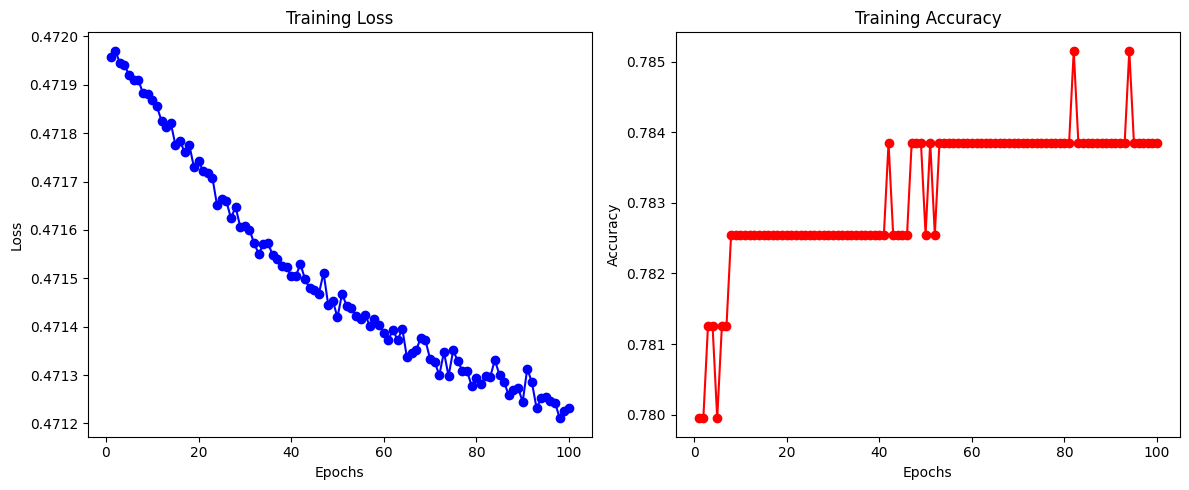

In [11]:
import matplotlib.pyplot as plt

# Lists to store training loss and accuracy values
training_loss = []
training_accuracy = []

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in dataloader:
        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels.unsqueeze(1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        predicted_labels = (outputs > 0.5).float()
        correct_predictions += (predicted_labels == labels.unsqueeze(1)).sum().item()
        total_samples += labels.size(0)

        # Accumulate loss
        total_loss += loss.item()

    # Calculate average loss and accuracy for the epoch
    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / total_samples

    # Append to lists for plotting
    training_loss.append(avg_loss)
    training_accuracy.append(accuracy)

    # Print the loss and accuracy at the end of each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

# Plot the training loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), training_loss, marker='o', linestyle='-', color='b')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot the training accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), training_accuracy, marker='o', linestyle='-', color='r')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


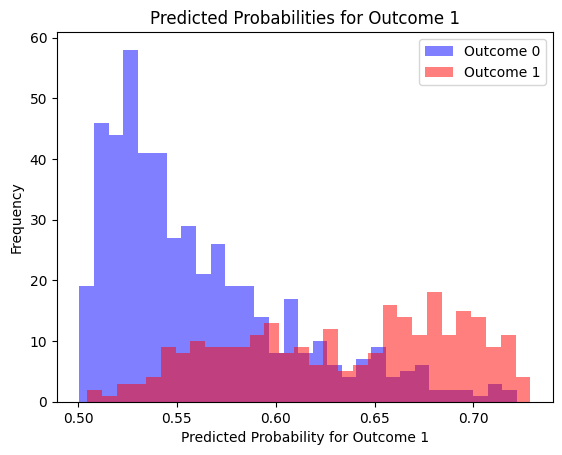

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store predicted probabilities and true outcomes
predicted_probabilities = []
true_outcomes = []

# Prediction loop
for inputs, labels in dataloader:
    # Forward pass
    outputs = model(inputs)

    # Calculate predicted probabilities (sigmoid output)
    predicted_probs = torch.sigmoid(outputs)

    # Extract the probabilities for Outcome 1
    probs_1 = predicted_probs[:, 0].detach().numpy()

    # Extract the true outcomes
    true_outcomes.extend(labels.numpy())

    # Store the predicted probabilities
    predicted_probabilities.extend(probs_1)

# Convert the lists to NumPy arrays
predicted_probabilities = np.array(predicted_probabilities)
true_outcomes = np.array(true_outcomes)

# Create histograms for predicted probabilities of Outcome 1
plt.hist(predicted_probabilities[true_outcomes == 0], bins=30, color='blue', alpha=0.5, label='Outcome 0')
plt.hist(predicted_probabilities[true_outcomes == 1], bins=30, color='red', alpha=0.5, label='Outcome 1')
plt.xlabel('Predicted Probability for Outcome 1')
plt.ylabel('Frequency')
plt.title('Predicted Probabilities for Outcome 1')
plt.legend()
plt.show()
